In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("data.csv")
df.head()
df["final_result"] = df["final_result"].replace({"Distinction": "Pass"})
df = df[df["final_result"].isin(["Pass", "Fail"])]
df["final_result"].value_counts()
# Grouping the education levels together as No Formal Qualifications and Post Graduate Qualification have very low counts
# We can combine these with the closest education qualifications
df["highest_education"] = df["highest_education"].apply(
    lambda x: "HE Qualification"
    if x in ["HE Qualification", "Post Graduate Qualification"]
    else x
)
df["highest_education"] = df["highest_education"].apply(
    lambda x: "Lower Than A level"
    if x in ["Lower Than A Level", "No Formal quals"]
    else x
)

In [2]:
df = df.dropna()

In [3]:
print("length of df: ", len(df))

length of df:  20290


In [4]:
df = df.drop(['id_student','code_presentation','region','final_result','module_presentation','mark','total_score*weight','imd_band'],axis=1)

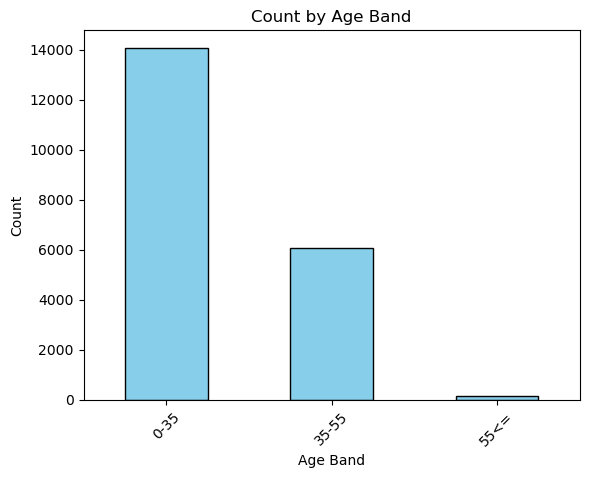

In [5]:
df['age_band'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
df['age_band'].value_counts()

age_band
0-35     14080
35-55     6058
55<=       152
Name: count, dtype: int64

In [7]:
## Sincle the count of the last age band is not very high we can combine it with the previous one
df['age_band'] = df['age_band'].apply(lambda x: '35-55' if x=='55<=' else x)

Text(0, 0.5, 'Count')

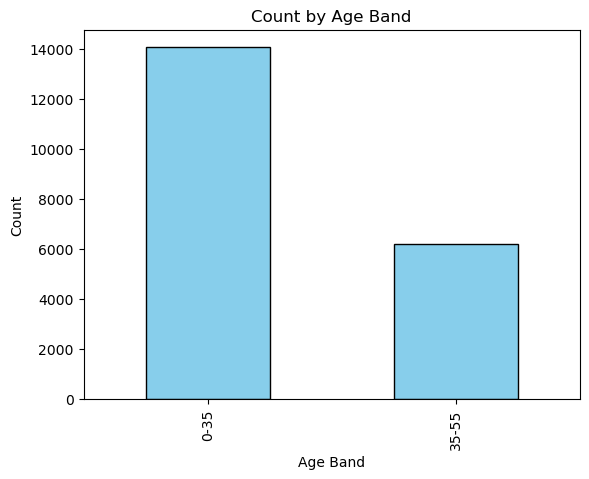

In [8]:
# age band after modification
df['age_band'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Count')

In [9]:
one_hot = pd.get_dummies(df['code_module'], prefix='code_module',drop_first=True)
df = pd.concat([one_hot, df], axis=1)

In [10]:
df = df.drop(['code_module'],axis=1)

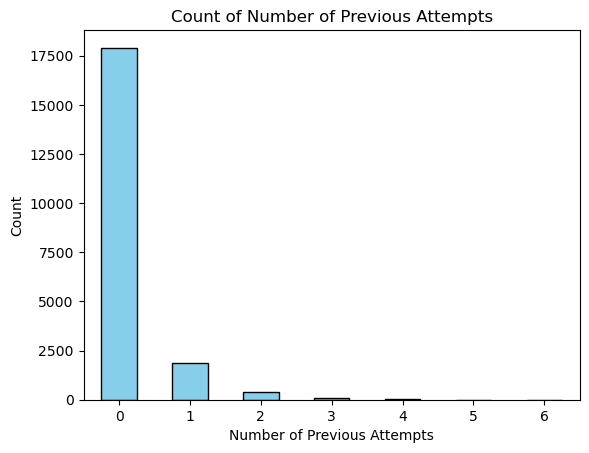

In [11]:
df['num_of_prev_attempts'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Number of Previous Attempts')
plt.xlabel('Number of Previous Attempts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [12]:
df['num_of_prev_attempts']= df['num_of_prev_attempts'].apply(lambda x: 1 if x>=1 else 0)

In [13]:
df.columns

Index(['code_module_BBB', 'code_module_CCC', 'code_module_DDD',
       'code_module_EEE', 'code_module_FFF', 'code_module_GGG',
       'attempted_weight', 'adjusted_mark', 'gender', 'highest_education',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability'],
      dtype='object')

In [14]:
df.dtypes

code_module_BBB            bool
code_module_CCC            bool
code_module_DDD            bool
code_module_EEE            bool
code_module_FFF            bool
code_module_GGG            bool
attempted_weight        float64
adjusted_mark           float64
gender                   object
highest_education        object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
dtype: object

In [15]:
ordinal_modules = ['attempted_weight','num_of_prev_attempts','studied_credits']